# Задача 1

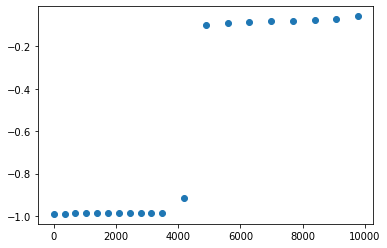

In [1]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

x = np.linspace(x1[0], x1[-1], 100)

from scipy import interpolate
import matplotlib.pyplot as plt

plt.scatter(x1, y1)

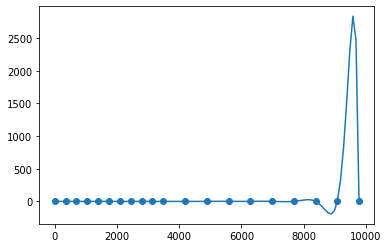

In [2]:
# пункт A

f_lagrange = interpolate.lagrange(x1, y1)
plt.plot(x, f_lagrange(x))
plt.scatter(x1, y1)

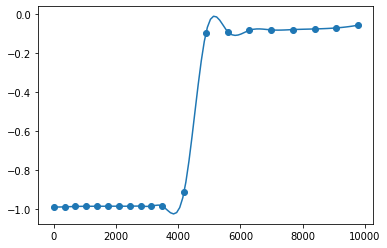

In [3]:
# пункт B

f_cspline = interpolate.CubicSpline(x1, y1)
plt.plot(x, f_cspline(x))
plt.scatter(x1, y1)

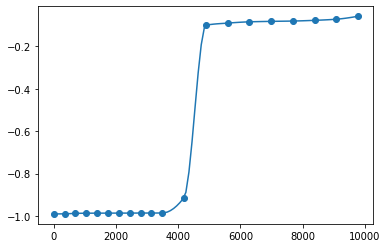

In [4]:
# пункт C

f_cinter = interpolate.PchipInterpolator(x1, y1)
plt.scatter(x1, y1)
plt.plot(x, f_cinter(x))

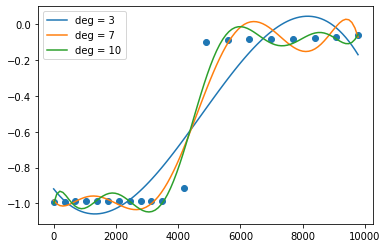

In [5]:
# пункт D

p_3 = np.polyfit(x1, y1, 3)
p_7 = np.polyfit(x1, y1, 7)
p_10 = np.polyfit(x1, y1, 10)

plt.scatter(x1, y1)
plt.plot(x, np.polyval(p_3, x), label="deg = 3")
plt.plot(x, np.polyval(p_7, x), label="deg = 7")
plt.plot(x, np.polyval(p_10, x), label="deg = 10")

plt.legend()

# Задача 2

In [6]:
class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        l = np.zeros(self.xk.size)
        for i in range(self.xk.size):
            l[i] = np.product((x - np.delete(self.xk, i)) / (self.xk[i] - np.delete(self.xk, i)))
        
        return np.sum(self.yk * l)
        

In [7]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

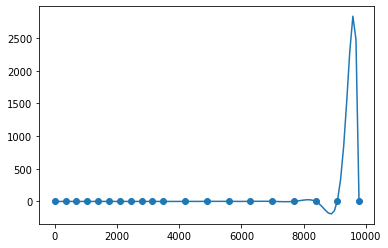

In [8]:
f_lagr = LagrangeInterpolator(x1, y1)

plt.scatter(x1, y1)
plt.plot(x, np.vectorize(f_lagr)(x))

Получился такой же результат как и со встроенным классом

# Задача 3

### Феномен Рунге

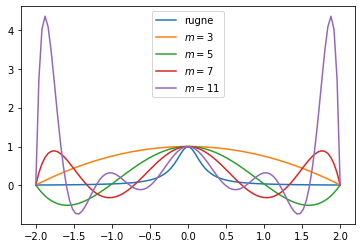

In [9]:
def runge(x):
    return 1 / ( 1 + 25 * x ** 2)

f_3 = interpolate.lagrange(np.linspace(-2, 2, 3), runge(np.linspace(-2, 2, 3)))
f_5 = interpolate.lagrange(np.linspace(-2, 2, 5), runge(np.linspace(-2, 2, 5)))
f_7 = interpolate.lagrange(np.linspace(-2, 2, 7), runge(np.linspace(-2, 2, 7)))
f_11 = interpolate.lagrange(np.linspace(-2, 2, 11), runge(np.linspace(-2, 2, 11)))

x = np.linspace(-2, 2, 100)
plt.plot(x, runge(x), label="rugne")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

### Узлы Чебышева

In [10]:
def cheb_nodes(n, a=-1, b=1):
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * (2 * np.arange(n, 0, -1) - 1) / (2 * n))

In [11]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

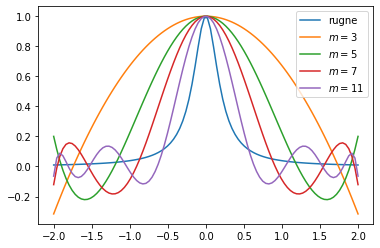

In [12]:
f_3 = interpolate.lagrange(cheb_nodes(3, -2, 2), runge(cheb_nodes(3, -2, 2)))
f_5 = interpolate.lagrange(cheb_nodes(5, -2, 2), runge(cheb_nodes(5, -2, 2)))
f_7 = interpolate.lagrange(cheb_nodes(7, -2, 2), runge(cheb_nodes(7, -2, 2)))
f_11 = interpolate.lagrange(cheb_nodes(11, -2, 2), runge(cheb_nodes(11, -2, 2)))


x = np.linspace(-2, 2, 100)
plt.plot(x, runge(x), label="rugne")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

Видим, что расхождение на краях меньше

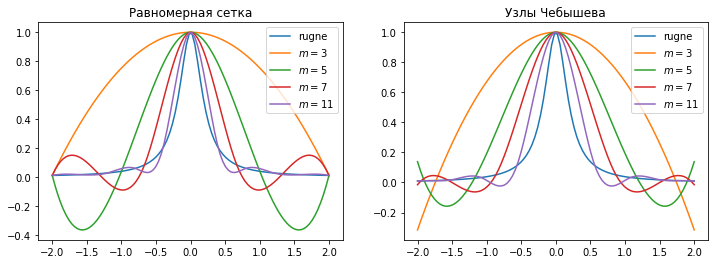

In [13]:
# интерполяция сплайном

f_3 = interpolate.CubicSpline(np.linspace(-2, 2, 3), runge(np.linspace(-2, 2, 3)))
f_5 = interpolate.CubicSpline(np.linspace(-2, 2, 5), runge(np.linspace(-2, 2, 5)))
f_7 = interpolate.CubicSpline(np.linspace(-2, 2, 7), runge(np.linspace(-2, 2, 7)))
f_11 = interpolate.CubicSpline(np.linspace(-2, 2, 11), runge(np.linspace(-2, 2, 11)))

f_3c = interpolate.CubicSpline(cheb_nodes(3, -2, 2), runge(cheb_nodes(3, -2, 2)))
f_5c = interpolate.CubicSpline(cheb_nodes(5, -2, 2), runge(cheb_nodes(5, -2, 2)))
f_7c = interpolate.CubicSpline(cheb_nodes(7, -2, 2), runge(cheb_nodes(7, -2, 2)))
f_11c = interpolate.CubicSpline(cheb_nodes(11, -2, 2), runge(cheb_nodes(11, -2, 2)))


x = np.linspace(-2, 2, 100)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Равномерная сетка")
plt.plot(x, runge(x), label="rugne")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

plt.subplot(122)
plt.title("Узлы Чебышева")
plt.plot(x, runge(x), label="rugne")
plt.plot(x, f_3c(x), label="$m = 3$")
plt.plot(x, f_5c(x), label="$m = 5$")
plt.plot(x, f_7c(x), label="$m = 7$")
plt.plot(x, f_11c(x), label="$m = 11$")
plt.legend()

Видим, что у сплайна расхождения при равномерной сетке и узлах Чебышева примерно одинаковые.  
Видим, что сплайн не демонстрирует эффект Рунге

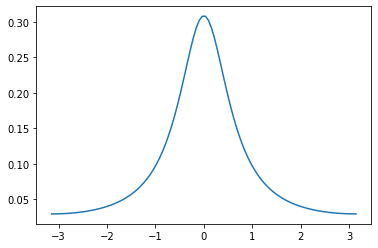

In [14]:
def u(x):
    eps = 0.21
    return np.sqrt(eps * (1 - eps)) / (2 * np.pi * (1 + eps - np.cos(x)))

x = np.linspace(- np.pi, np.pi, 100)
plt.plot(x, u(x))

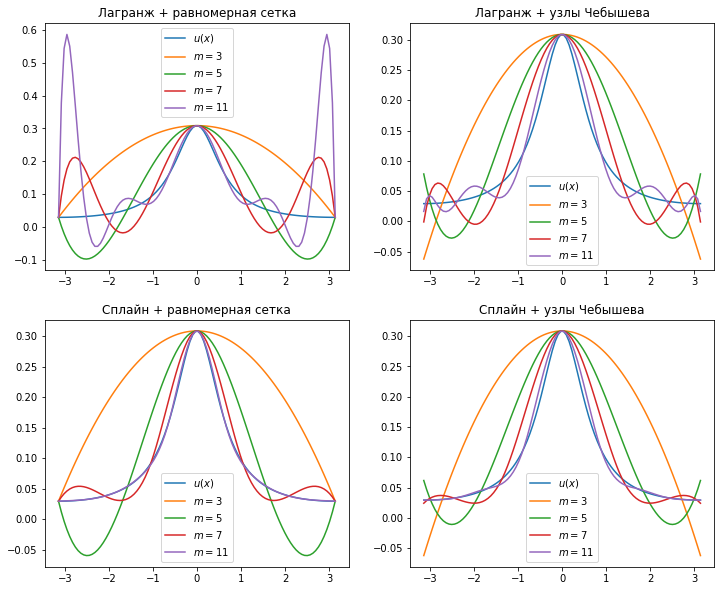

In [15]:
plt.figure(figsize=(12, 10))
x = np.linspace(-np.pi, np.pi, 100)

plt.subplot(221)

f_3 = interpolate.lagrange(np.linspace(-np.pi, np.pi, 3), u(np.linspace(-np.pi, np.pi, 3)))
f_5 = interpolate.lagrange(np.linspace(-np.pi, np.pi, 5), u(np.linspace(-np.pi, np.pi, 5)))
f_7 = interpolate.lagrange(np.linspace(-np.pi, np.pi, 7), u(np.linspace(-np.pi, np.pi, 7)))
f_11 = interpolate.lagrange(np.linspace(-np.pi, np.pi, 11), u(np.linspace(-np.pi, np.pi, 11)))

plt.title("Лагранж + равномерная сетка")
plt.plot(x, u(x), label="$u(x)$")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

plt.subplot(222)

f_3 = interpolate.lagrange(cheb_nodes(3, -np.pi, np.pi), u(cheb_nodes(3, -np.pi, np.pi)))
f_5 = interpolate.lagrange(cheb_nodes(5, -np.pi, np.pi), u(cheb_nodes(5, -np.pi, np.pi)))
f_7 = interpolate.lagrange(cheb_nodes(7, -np.pi, np.pi), u(cheb_nodes(7, -np.pi, np.pi)))
f_11 = interpolate.lagrange(cheb_nodes(11, -np.pi, np.pi), u(cheb_nodes(11, -np.pi, np.pi)))

plt.title("Лагранж + узлы Чебышева")
plt.plot(x, u(x), label="$u(x)$")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

plt.subplot(223)

f_3 = interpolate.CubicSpline(np.linspace(-np.pi, np.pi, 3), u(np.linspace(-np.pi, np.pi, 3)))
f_5 = interpolate.CubicSpline(np.linspace(-np.pi, np.pi, 5), u(np.linspace(-np.pi, np.pi, 5)))
f_7 = interpolate.CubicSpline(np.linspace(-np.pi, np.pi, 7), u(np.linspace(-np.pi, np.pi, 7)))
f_11 = interpolate.CubicSpline(np.linspace(-np.pi, np.pi, 11), u(np.linspace(-np.pi, np.pi, 11)))

plt.title("Сплайн + равномерная сетка")
plt.plot(x, u(x), label="$u(x)$")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

plt.subplot(224)

f_3 = interpolate.CubicSpline(cheb_nodes(3, -np.pi, np.pi), u(cheb_nodes(3, -np.pi, np.pi)))
f_5 = interpolate.CubicSpline(cheb_nodes(5, -np.pi, np.pi), u(cheb_nodes(5, -np.pi, np.pi)))
f_7 = interpolate.CubicSpline(cheb_nodes(7, -np.pi, np.pi), u(cheb_nodes(7, -np.pi, np.pi)))
f_11 = interpolate.CubicSpline(cheb_nodes(11, -np.pi, np.pi), u(cheb_nodes(11, -np.pi, np.pi)))

plt.title("Сплайн + узлы Чебышева")
plt.plot(x, u(x), label="$u(x)$")
plt.plot(x, f_3(x), label="$m = 3$")
plt.plot(x, f_5(x), label="$m = 5$")
plt.plot(x, f_7(x), label="$m = 7$")
plt.plot(x, f_11(x), label="$m = 11$")
plt.legend()

# Задача 4  

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

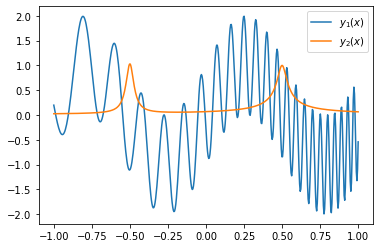

In [16]:
def y_1(x):
    return np.sin(6 * x) + np.sin(60 * np.exp(x))

def y_2(x):
    return 1 / (1 + 1000 * (x + 0.5) ** 2 ) + 1 / np.sqrt(1 + 1000 * (x - 0.5) ** 2)

x = np.linspace(-1, 1, 500)
plt.plot(x, y_1(x), label="$y_1(x)$")
plt.plot(x, y_2(x), label="$y_2(x)$")
plt.legend()

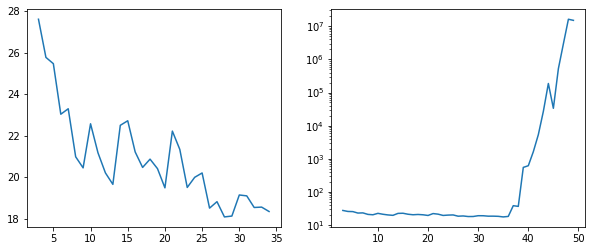

In [17]:
from numpy.linalg import norm
N = 50
errors = np.zeros(N)

for i in range(3, N):
    f = interpolate.lagrange(cheb_nodes(i), y_1(cheb_nodes(i)))
    errors[i] = norm(y_1(x) - f(x))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.arange(3, 35), errors[3:35])
    
plt.subplot(122)
plt.yscale("log")
plt.plot(np.arange(3, N), errors[3:])

Видим, что ошибка сначала падает, но после 39 начинает резко возрастать

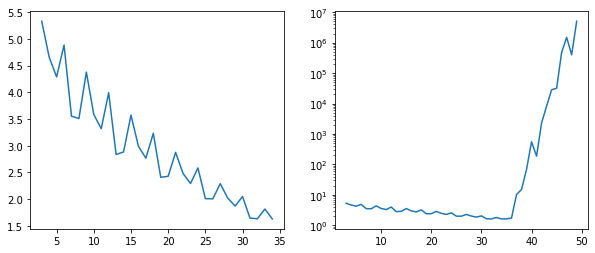

In [18]:

N = 50
errors = np.zeros(N)

for i in range(3, N):
    f = interpolate.lagrange(cheb_nodes(i), y_2(cheb_nodes(i)))
    errors[i] = norm(y_2(x) - f(x))

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.arange(3, 35), errors[3:35])
    
plt.subplot(122)
plt.yscale("log")
plt.plot(np.arange(3, N), errors[3:])

С $y_2$ аналогичная ситуация

# Задача 5

100


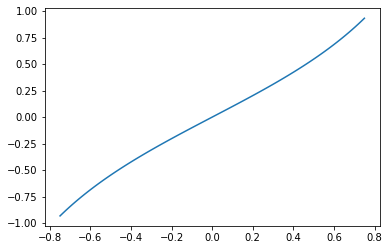

In [19]:
with np.load('data_interp.npz') as data:
  x4, y4 = data['x4'], data['y4']

print(x4.size)
plt.plot(x4, y4)

In [20]:
from scipy.optimize import curve_fit

def poly_5(x, p_0, p_1, p_2, p_3, p_4, p_5):
    return np.polyval((p_5, p_4, p_3, p_2, p_1, p_0), x)

def fraction(x, p_0, p_1, p_2, p_3, q_1, q_2):
    return np.polyval((p_3, p_2, p_1, p_0), x) / np.polyval((q_2, q_1, 1), x)

[ 5.80317572e-09  1.00131513e+00 -1.00520828e-07  3.13668607e-01
  2.07258701e-07  2.01784528e-01]
[-7.04797315e-10  1.00001231e+00 -4.92255940e-08 -6.85261215e-02
 -4.78989677e-08 -4.01688488e-01]
Норма разности y1 и начальных данных = 0.0012742638879382848
Норма разности y2 и начальных данных = 1.183667981854004e-05


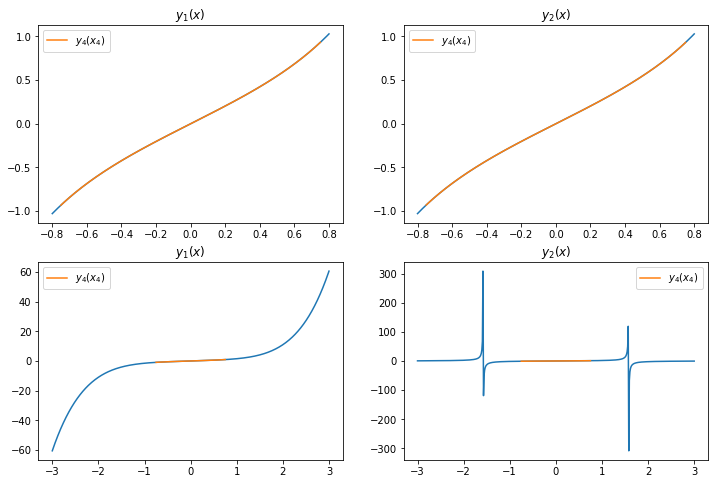

In [21]:
plt.figure(figsize=(12, 8))
x = np.linspace(-0.8, 0.8, 500)
x_2 = np.linspace(-3, 3, 500)

plt.subplot(221)
opt_1, _ = curve_fit(poly_5, x4, y4)
print(opt_1)
plt.plot(x, poly_5(x, *opt_1))
plt.plot(x4, y4, label="$y_4(x_4)$")
plt.title("$y_1(x)$")
plt.legend()

plt.subplot(222)
opt_2, _ = curve_fit(fraction, x4, y4)
print(opt_2)
plt.plot(x, fraction(x, *opt_2))
plt.plot(x4, y4, label="$y_4(x_4)$")
plt.title("$y_2(x)$")
plt.legend()

plt.subplot(223)
plt.plot(x_2, poly_5(x_2, *opt_1))
plt.plot(x4, y4, label="$y_4(x_4)$")
plt.title("$y_1(x)$")
plt.legend()


plt.subplot(224)
plt.plot(x_2, fraction(x_2, *opt_2))
plt.plot(x4, y4, label="$y_4(x_4)$")
plt.title("$y_2(x)$")
plt.legend()



print("Норма разности y1 и начальных данных =", norm(y4 - poly_5(x4, *opt_1)))
print("Норма разности y2 и начальных данных =", norm(y4 - fraction(x4, *opt_2)))

Видим, что вторая функция меньше отличается от первой на заданном учатке. Получаем решение:
$$
y = \dfrac{x - 0.0685 \cdot x ^{3}}{1 - 0.402 \cdot x ^ {2}}
$$

# Задача 6
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

32


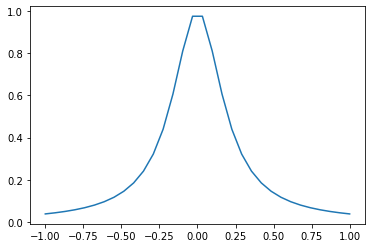

In [22]:
with np.load('data_interp.npz') as data:
  x5, y5 = data['x5'], data['y5']

print(x5.size)
plt.plot(x5, y5)

In [23]:
def g(s):
    return np.polyval((1225, 0, 1800, 0, 3024, 0, 6720, 0, 40320, 0), s) / 53089

In [24]:
# найдём замену координат s
from scipy.optimize import root
sol = root(lambda x:g(x) - x5, np.zeros(32))
s = sol.x

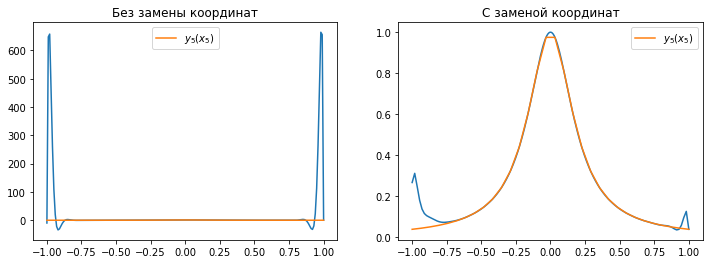

In [25]:
plt.figure(figsize=(12, 4))
x = np.linspace(-1, 1, 200)

plt.subplot(121)
plt.title("Без замены координат")
f_1 = interpolate.lagrange(x5, y5)
plt.plot(x, f_1(x))
plt.plot(x5, y5, label="$y_5(x_5)$")
plt.legend()

plt.subplot(122)
plt.title("С заменой координат")
f_2 = interpolate.lagrange(s, y5)
plt.plot(g(x), f_2(x))
plt.plot(x5, y5, label="$y_5(x_5)$")
plt.legend()

Видим, что замена координат сильно уменьшила явление Рунге